In [72]:
# Python code for the plot
# Code "borrowed" from: https://en.wikipedia.org/wiki/Geometric_Brownian_motion and its cited sources

import numpy as np
import matplotlib.pyplot as plt

def calcR(entry2, entry1):
    return (entry2 / entry1) - 1.0 # return = (current/previous) - 1

def calcMu(entries):
    mu = 0
    for i in range(len(entries) - 1):
        mu += calcR(entries[i+1], entries[i])
    
    mu /= len(entries) - 1 # iterating through length-1 items, so n=length-1
    return mu

def calcSigma(entries, mu):
    sigma = 0
    for i in range(len(entries) - 1):
        sigma += (calcR(entries[i+1], entries[i]) - mu) ** 2 #sum (Ri - MU)^2
    
    sigma = (sigma / (len(entries) - 2)) ** (0.5) #square_root(1/(n-1) * that sum) ; n-1 = (length - 1) - 1 pairs
    return sigma

In [73]:
# Real historical EURUSD prices from 2020
prices = [1.1001400000000001, 1.10002, 1.10009, 1.10042, 1.1001, 1.09989, 1.10056, 1.10049, 1.10066, 1.10072, 1.1007, 1.1005, 1.10064, 1.10068, 1.10077, 1.10113, 1.10156, 1.10138, 1.1011, 1.10023, 1.10035, 1.10082, 1.10055, 1.10061, 1.10061, 1.10078, 1.1008499999999999, 1.1009, 1.10082, 1.1007500000000001, 1.10104, 1.10111, 1.10102, 1.10115, 1.10101, 1.10105, 1.10103, 1.10103, 1.1009, 1.10112, 1.1005, 1.10045, 1.10048, 1.09962, 1.09964, 1.09925, 1.10001, 1.10275, 1.10188, 1.10162, 1.1017, 1.10174, 1.10164, 1.10152, 1.10208, 1.10183, 1.10194, 1.10183, 1.10167, 1.10177, 1.10186, 1.10191, 1.10167, 1.1017, 1.10132, 1.10142, 1.10117, 1.10081, 1.10187, 1.10327, 1.10445, 1.10707, 1.10758, 1.10749, 1.10785, 1.10782, 1.10848, 1.10784, 1.10761, 1.10759, 1.10734, 1.10722, 1.10728, 1.1076, 1.1074, 1.10732, 1.10785, 1.10763, 1.10843, 1.10834, 1.10727, 1.10749, 1.10734, 1.10723, 1.10822, 1.1082, 1.10889, 1.10882, 1.10825, 1.10811, 1.10807, 1.10809, 1.10818, 1.10817, 1.10816, 1.10791, 1.10796, 1.10792, 1.10749, 1.10752, 1.10752, 1.10772, 1.10837, 1.10724, 1.10741, 1.10687, 1.10781, 1.11072, 1.10995, 1.10879, 1.10753, 1.10777, 1.1072899999999999, 1.10744, 1.10793, 1.10775, 1.10775, 1.10826, 1.10823, 1.1084100000000001, 1.10827, 1.10852, 1.10831, 1.10831, 1.10823, 1.108, 1.1089, 1.1092, 1.10886, 1.10905, 1.10964, 1.10928, 1.11, 1.10927, 1.11033, 1.11046, 1.11008, 1.11003, 1.11027, 1.11042, 1.1104, 1.11038, 1.1103, 1.11064, 1.11076, 1.11075, 1.11071, 1.11064, 1.11043, 1.11069, 1.11074, 1.10966, 1.10937, 1.10932, 1.10897, 1.1078000000000001, 1.1057, 1.1050200000000001, 1.10515, 1.10547, 1.10524, 1.10558, 1.10598, 1.10595, 1.10571, 1.10583, 1.1056300000000001, 1.10571, 1.1054, 1.10544, 1.10564, 1.10586, 1.10617, 1.10655, 1.10636, 1.10654, 1.10703, 1.10731, 1.10777, 1.10751, 1.10722, 1.10688, 1.10667, 1.10567, 1.10611, 1.10638, 1.10648, 1.10635, 1.10646, 1.10644, 1.10642, 1.10678, 1.10697, 1.10674, 1.10666, 1.1067, 1.10651, 1.107, 1.10735, 1.10768, 1.10765, 1.10839, 1.10755, 1.10785, 1.10804, 1.10898, 1.10894, 1.10865, 1.10899, 1.10956, 1.10955, 1.10919, 1.1093, 1.10924, 1.10917, 1.10952, 1.10927, 1.10924, 1.10896, 1.10893, 1.1086, 1.1084, 1.1084, 1.10835, 1.10821, 1.10818, 1.10723, 1.10853, 1.10908, 1.10842, 1.1091199999999999, 1.10922, 1.10979, 1.11392, 1.11388, 1.11294, 1.1132900000000001, 1.11326, 1.11378, 1.11398, 1.11439, 1.11435, 1.11418, 1.11399, 1.11361, 1.11374, 1.11356, 1.11275, 1.11287, 1.11322, 1.11318, 1.11385, 1.11248, 1.11171, 1.11142, 1.11102, 1.11099, 1.11129, 1.1132, 1.11286, 1.11832, 1.11833, 1.11697, 1.11768, 1.11737, 1.11776, 1.11708, 1.11746, 1.1166800000000001, 1.11653, 1.11771, 1.11801, 1.11794, 1.11751, 1.11711, 1.11697, 1.11524, 1.11354, 1.11274, 1.11156, 1.11191, 1.1120700000000001, 1.11165, 1.11173, 1.11292, 1.11242, 1.11255, 1.11281, 1.11293, 1.11324, 1.11327, 1.11349, 1.11427, 1.11454, 1.11314, 1.11347, 1.11386, 1.11444, 1.11446, 1.11534, 1.11502, 1.11366, 1.11386, 1.11427, 1.1146, 1.11474, 1.11444, 1.1143399999999999, 1.11379, 1.11356, 1.11371, 1.11391, 1.11441, 1.11468, 1.11472, 1.11473, 1.11458, 1.11423, 1.1138, 1.11501, 1.11594, 1.11608, 1.11695, 1.1146, 1.11502, 1.11557, 1.11475, 1.11516, 1.11502, 1.11473, 1.11463, 1.11487, 1.11524, 1.11513, 1.11471, 1.11408, 1.11367, 1.11335, 1.11311, 1.11349, 1.11382, 1.11306, 1.11288, 1.11328, 1.11334, 1.11278, 1.11221, 1.11172, 1.11156, 1.11252, 1.11119, 1.1118, 1.11157, 1.11153, 1.11192, 1.11127, 1.11158, 1.11154, 1.11166, 1.11236, 1.11264, 1.11298, 1.11256, 1.11267, 1.113, 1.11262, 1.11292, 1.11363, 1.1144, 1.11269, 1.11158, 1.1115, 1.11222, 1.11154, 1.11274, 1.11249, 1.11273, 1.1124, 1.11237, 1.11204, 1.11238, 1.11231, 1.11197, 1.11184, 1.11157, 1.11155, 1.11156, 1.11194, 1.11166, 1.11181, 1.11219, 1.1120700000000001, 1.11127, 1.10972, 1.11, 1.1091199999999999, 1.10834, 1.10863, 1.10755, 1.10684, 1.1068, 1.10752, 1.1077, 1.10751, 1.1078000000000001, 1.10802, 1.10762, 1.10783, 1.10783, 1.10812, 1.10782, 1.1082, 1.10838, 1.10837, 1.10836, 1.10834, 1.10829, 1.10808, 1.10742, 1.10802, 1.10871, 1.1087, 1.10897, 1.10907, 1.10896, 1.10934, 1.10923, 1.10895, 1.10898, 1.10916, 1.10909, 1.10877, 1.10879, 1.1089, 1.10881, 1.10893, 1.10873, 1.10852, 1.10838, 1.10748, 1.10721, 1.10736, 1.1083, 1.10782, 1.10812, 1.10899, 1.1084100000000001, 1.10876, 1.1085099999999999, 1.10968, 1.10891, 1.10898, 1.10859, 1.10901, 1.10935, 1.10915, 1.10847, 1.10853, 1.10924, 1.10981, 1.10909, 1.1099, 1.11021, 1.11025, 1.11088, 1.1103, 1.11029, 1.10974, 1.10953, 1.11012, 1.1101, 1.11092, 1.11163, 1.11187, 1.11202, 1.11206, 1.11196, 1.11294, 1.11327, 1.11384, 1.11487, 1.11474, 1.11527, 1.11533, 1.1158, 1.11632, 1.11733, 1.11835, 1.11837, 1.11872, 1.1176, 1.1176, 1.11776, 1.11813, 1.11876, 1.11944, 1.12042, 1.11991, 1.11967, 1.12025, 1.11954, 1.11958, 1.11968, 1.11992, 1.1194, 1.11916, 1.11896, 1.11947, 1.12059, 1.12005, 1.12162, 1.12105, 1.12029, 1.12019, 1.11982, 1.11985, 1.11996, 1.12012, 1.1203400000000001, 1.12124, 1.12099, 1.12035, 1.12032, 1.12069, 1.12058, 1.12053, 1.12121, 1.12136, 1.12171, 1.12277, 1.12305, 1.12379, 1.12199, 1.12237, 1.12263, 1.12288, 1.12232, 1.12167, 1.12171, 1.12142, 1.12189, 1.12184, 1.12211, 1.12224, 1.12134, 1.12013, 1.12044, 1.12068, 1.12099, 1.1212, 1.12032, 1.11984, 1.11848, 1.11931, 1.11964, 1.11743, 1.12006, 1.11663, 1.11699, 1.11702, 1.11667, 1.11694, 1.11715, 1.11715, 1.11709, 1.11756, 1.11737, 1.11725, 1.11719, 1.11701, 1.11665, 1.11693, 1.11532, 1.11513, 1.11402, 1.11361, 1.11301, 1.11392, 1.11384, 1.11525, 1.11635, 1.1172, 1.11721, 1.11667, 1.11676, 1.11616, 1.11559, 1.11594, 1.11605, 1.11636, 1.11629, 1.11655, 1.1166, 1.11644, 1.11624, 1.11609, 1.11646, 1.11788, 1.11934, 1.11964, 1.12033, 1.11981, 1.11977, 1.11833, 1.11887, 1.11874, 1.11951, 1.1192, 1.11913, 1.11937, 1.11977, 1.1195599999999999, 1.11955, 1.11899, 1.11936, 1.11915, 1.11924, 1.1191, 1.11831, 1.11816, 1.11742, 1.11847, 1.11846, 1.11764, 1.11818, 1.11748, 1.11563, 1.11478, 1.11418, 1.11371, 1.11425, 1.11436, 1.11446, 1.11438, 1.11471, 1.11479, 1.11541, 1.11587, 1.11558, 1.11588, 1.11547, 1.11478, 1.11492, 1.11502, 1.11513, 1.1135, 1.11384, 1.11274, 1.11273, 1.11168, 1.112, 1.11247, 1.11199, 1.11166, 1.1118, 1.11132, 1.11113, 1.11119, 1.11049, 1.11098, 1.1113, 1.11135, 1.11175, 1.11153, 1.11154, 1.11155, 1.11184, 1.11123, 1.11153, 1.11174, 1.10996, 1.11097, 1.11047, 1.11136, 1.1115, 1.1108500000000001, 1.1102400000000001, 1.11062, 1.11047, 1.11051, 1.11061, 1.11064, 1.11056, 1.11066, 1.11094, 1.1107, 1.11043, 1.11081, 1.11082, 1.11076, 1.11091, 1.11093, 1.1107, 1.10995, 1.10964, 1.10929, 1.10932, 1.10984, 1.10968, 1.11008, 1.11129, 1.11181, 1.11225, 1.11186, 1.11221, 1.11212, 1.11213, 1.1117, 1.11164, 1.11188, 1.11214, 1.11259, 1.11293, 1.11274, 1.11298, 1.11289, 1.11228, 1.11281, 1.11152, 1.11168, 1.11205, 1.11247, 1.11188, 1.11241, 1.11332, 1.11374, 1.11399, 1.11398, 1.11382, 1.11377, 1.11345, 1.11354, 1.11355, 1.11385, 1.1137299999999999, 1.11374, 1.11357, 1.11366, 1.11371, 1.11446, 1.11422, 1.11353, 1.11315, 1.1134, 1.11305, 1.11206, 1.11103, 1.11218, 1.11223, 1.11297, 1.1131199999999999, 1.11316, 1.11281, 1.11285, 1.11265, 1.11264, 1.11276, 1.11296, 1.11298, 1.11291, 1.11303, 1.11332, 1.11341, 1.11356, 1.11285, 1.11304, 1.11285, 1.11389, 1.11481, 1.1141, 1.11492, 1.11524, 1.11523, 1.11597, 1.11577, 1.11517, 1.11505, 1.11525, 1.11499, 1.11517, 1.11525, 1.11549, 1.11537, 1.11518, 1.11529, 1.1151200000000001, 1.11499, 1.11505, 1.11477, 1.11564, 1.11534, 1.11575, 1.1159, 1.11649, 1.11516, 1.11416, 1.11408, 1.11304, 1.11348, 1.11348, 1.11349, 1.1138, 1.11358, 1.11372, 1.11371, 1.11376, 1.11369, 1.11364, 1.11311, 1.11321, 1.11366, 1.11397, 1.11364, 1.11357, 1.11277, 1.11161, 1.11124, 1.11099, 1.11004, 1.11007, 1.10939, 1.10918, 1.1091, 1.10924, 1.1093, 1.10926, 1.10895, 1.10906, 1.10947, 1.10928, 1.10962, 1.10972, 1.10958, 1.10964, 1.10979, 1.11005, 1.10943, 1.10889, 1.10895, 1.1084, 1.10857, 1.10838, 1.10835, 1.10821, 1.10827, 1.10838, 1.10832, 1.10891, 1.10917, 1.10974, 1.10968, 1.10966, 1.10962, 1.10923, 1.10905, 1.10957, 1.1097299999999999, 1.10992, 1.10952, 1.10941, 1.10921, 1.10903, 1.10905, 1.11037, 1.11054, 1.11079, 1.11135, 1.11029, 1.10977, 1.10956, 1.10916, 1.10923, 1.10948, 1.10871, 1.10812, 1.10826, 1.1085099999999999, 1.10827, 1.10817, 1.10803, 1.10814, 1.10823, 1.10844, 1.10827, 1.10858, 1.10812, 1.10907, 1.1086, 1.10786, 1.10835, 1.10896, 1.10734, 1.10753, 1.10846, 1.10855, 1.10869, 1.10918, 1.10925, 1.10945, 1.10931, 1.10955, 1.10872, 1.10891, 1.10894, 1.10827, 1.1085099999999999, 1.10829, 1.10849, 1.10891, 1.10836, 1.10842, 1.1091199999999999, 1.10904, 1.10844, 1.10865, 1.10692, 1.10461, 1.10409, 1.10508, 1.10495, 1.10552, 1.10555, 1.10587, 1.10555, 1.10553, 1.10527, 1.10538, 1.10528, 1.10504, 1.10486, 1.10487, 1.10503, 1.1051, 1.10468, 1.10358, 1.10373, 1.10355, 1.10277, 1.10387, 1.1031, 1.10247, 1.10249, 1.1027, 1.10278, 1.10296, 1.10276, 1.1026, 1.10302, 1.10245, 1.1032, 1.10335, 1.10288, 1.1028, 1.10275, 1.10306, 1.10275, 1.10344, 1.10272, 1.10208, 1.1028, 1.10244, 1.1023, 1.10271, 1.10173, 1.10124, 1.10188, 1.10151, 1.10141, 1.10162, 1.10172, 1.10192, 1.1018, 1.10193, 1.10191, 1.10199, 1.10213, 1.10212, 1.10223, 1.10217, 1.10192, 1.10166, 1.10192, 1.10166, 1.10191, 1.10104, 1.10065, 1.10053, 1.1004, 1.09999, 1.10073]

#print(len(prices))

# np.random.seed(1) #Seed the RNG

1000


In [99]:
mu = calcMu(prices[100:600]) # percentage drift
n = 50  # number of time units to predict
dt = 20 # 11 # granularity of prediction
x0 = prices[0] # inital value
sigma = np.full(1, calcSigma(prices[100:600], mu)) # percentage volatility (put in a numpy array of size 1)
numPredictions = 1000 # number of lines we want on our graph

start: 1.10807
actual price at end: 1.11588
predicted price at end: [1.11718526]
dx: [0.00130526]


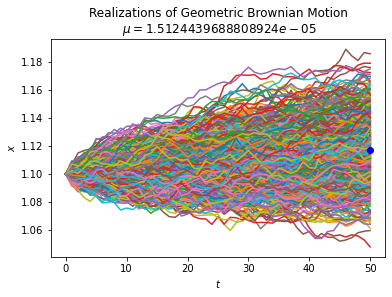

In [100]:
predicted = 0
for i in range(numPredictions):
    x = np.exp(
        (mu - sigma ** 2 / 2) * dt
        + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
    )
    x = np.vstack([np.ones(len(sigma)), x])
    x = x0 * x.cumprod(axis=0)
    # Solution function:
    # GBM = X0 * e ^ ((mu - (sigma^2 / 2) ) * t + sigma * Wt)
    plt.plot(x)
    predicted += x[n]
    
predicted /= numPredictions

print("start:", prices[100])
print("actual price at end:", prices[650 - 1])
print("predicted price at end:", predicted)
print("dx:", predicted - prices[650 - 1])

plt.plot(n, predicted, 'bo')
    
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $\mu=" + str(mu) + "$"
)
plt.show()

